NAME: SRIJA BASAK


PREPINSTA DATA ANALYTICS CAPSTONE PROJECT - MINUTES ACTIVITY

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
minuteCalories=pd.read_csv('/content/minuteCaloriesNarrow_merged.csv')
minuteIntensities=pd.read_csv('/content/minuteIntensitiesNarrow_merged.csv')
minuteMET=pd.read_csv('/content/minuteMETsNarrow_merged.csv')
minuteSleep=pd.read_csv('/content/minuteSleep_merged.csv')
minuteSteps=pd.read_csv('/content/minuteStepsNarrow_merged.csv')

In [ ]:
minuteCalories.isnull().sum()

Id                0
ActivityMinute    0
Calories          0
dtype: int64

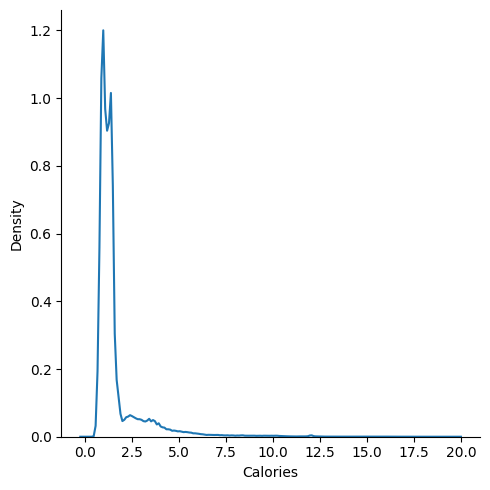

In [ ]:
sns.displot(minuteCalories.Calories, kind='kde')

In [ ]:
minuteCalories.Calories.fillna(minuteCalories.Calories.median(),inplace=True)

In [ ]:
minuteCalories.isnull().sum()

Id                0
ActivityMinute    0
Calories          0
dtype: int64

In [ ]:
minuteIntensities.isnull().sum()

Id                0
ActivityMinute    0
Intensity         0
dtype: int64

In [ ]:
minuteMET.isnull().sum()

Id                0
ActivityMinute    0
METs              0
dtype: int64

In [ ]:
minuteMET.METs.fillna(minuteMET.METs.median(),inplace=True)

In [ ]:
minuteMET.isnull().sum()

Id                0
ActivityMinute    0
METs              0
dtype: int64

In [ ]:
minuteSleep.isnull().sum()

Id       0
date     0
value    0
logId    0
dtype: int64

In [ ]:
minuteSteps.isnull().sum()

Id                0
ActivityMinute    0
Steps             0
dtype: int64

In [ ]:
minuteSteps.Steps.fillna(minuteSteps.Steps.median(),inplace=True)

In [ ]:
minuteSteps.isnull().sum()

Id                0
ActivityMinute    0
Steps             0
dtype: int64

In [ ]:
minuteCalories.head()

,Id,ActivityMinute,Calories
0,1503960366,4/12/2016 12:00:00 AM,0.7865
1,1503960366,4/12/2016 12:01:00 AM,0.7865
2,1503960366,4/12/2016 12:02:00 AM,0.7865
3,1503960366,4/12/2016 12:03:00 AM,0.7865
4,1503960366,4/12/2016 12:04:00 AM,0.7865


In [ ]:
minuteIntensities.head()

,Id,ActivityMinute,Intensity
0,1503960366,4/12/2016 12:00:00 AM,0
1,1503960366,4/12/2016 12:01:00 AM,0
2,1503960366,4/12/2016 12:02:00 AM,0
3,1503960366,4/12/2016 12:03:00 AM,0
4,1503960366,4/12/2016 12:04:00 AM,0


In [ ]:
minuteMET.head()

,Id,ActivityMinute,METs
0,1503960366,4/12/2016 12:00:00 AM,10
1,1503960366,4/12/2016 12:01:00 AM,10
2,1503960366,4/12/2016 12:02:00 AM,10
3,1503960366,4/12/2016 12:03:00 AM,10
4,1503960366,4/12/2016 12:04:00 AM,10


In [ ]:
minuteSleep.head()

,Id,date,value,logId
0,1503960366,4/12/2016 2:47:30 AM,3,11380564589
1,1503960366,4/12/2016 2:48:30 AM,2,11380564589
2,1503960366,4/12/2016 2:49:30 AM,1,11380564589
3,1503960366,4/12/2016 2:50:30 AM,1,11380564589
4,1503960366,4/12/2016 2:51:30 AM,1,11380564589


In [ ]:
minuteSteps.head()

,Id,ActivityMinute,Steps
0,1503960366,4/12/2016 12:00:00 AM,0
1,1503960366,4/12/2016 12:01:00 AM,0
2,1503960366,4/12/2016 12:02:00 AM,0
3,1503960366,4/12/2016 12:03:00 AM,0
4,1503960366,4/12/2016 12:04:00 AM,0


In [ ]:
minute1=pd.merge(minuteCalories,minuteIntensities,how='left',on=['Id','ActivityMinute'])

In [ ]:
minute2=pd.merge(minute1,minuteMET,how='left',on=['Id','ActivityMinute'])

In [ ]:
minute3=pd.merge(minute2,minuteSleep,how='left',on=['Id'])

In [ ]:
minuteActivity=pd.merge(minute3,minuteSteps,how='left',on=['Id','ActivityMinute'])

In [ ]:
minuteActivity.corr()

In [ ]:
hourly_activity_features=hourlyActivity[['Calories','TotalIntensity','AverageIntensity','StepTotal']]
hourly_activity_features.head()

In [ ]:
hourlyActivity.describe()

In [ ]:
import seaborn as sns
sns.heatmap(hourly_activity_features.corr())

Selecting important features using Chi-square test

In [ ]:
X=hourly_activity_features.iloc[:,1:]
Y=hourly_activity_features.iloc[:,0] #Calories column

In [ ]:
X.head()

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
best_features=SelectKBest(chi2,k=2)
hourlyActivity_best_features=best_features.fit_transform(X,Y)

print(hourlyActivity_best_features)

**Comparing previous 2 results, the best features to count calorie burning as per hourly activity are 'TotalIntensity' and 'StepTotal'**

In [ ]:
df=hourlyActivity[['TotalIntensity','StepTotal','Calories']]
df.corr()

In [ ]:
sns.heatmap(df.corr(),annot=True)

StepTotal and Calories have a correlation coefficient of 0.81
TotalIntensity and Calories have a correlation coefficient of 0.9

In [ ]:
sns.relplot(x="TotalIntensity",y="Calories",data=df)

In [ ]:
sns.lineplot(x="TotalIntensity",y="Calories",data=df)

Through these two above plots, it can be concluded that mostly as TotalIntensity increases, Calorie burning also increases

In [ ]:
sns.relplot(x="StepTotal",y="Calories",data=df)

In [ ]:
sns.lineplot(x="StepTotal",y="Calories",data=df)

In [ ]:
sns.boxplot(df["TotalIntensity"])

In [ ]:
sns.boxplot(df.StepTotal)

In [ ]:
sns.boxplot(df.Calories)

OUTLIER HANDLING USING IQR

In [ ]:
q1_Calories=df.Calories.quantile(0.25) #Q1
q3_Calories=df.Calories.quantile(0.75) #Q2

In [ ]:
IQR_Calories = q3_Calories - q1_Calories

In [ ]:
upper_limit_Calories=q3_Calories+1.5*IQR_Calories

In [ ]:
upper_limit_Calories

In [ ]:
df=df[df.Calories<upper_limit_Calories]

In [ ]:
sns.boxplot(df.Calories)

In [ ]:
q1_StepTotal=df.StepTotal.quantile(0.25)
q3_StepTotal=df.StepTotal.quantile(0.75)

In [ ]:
IQR_StepTotal=q3_StepTotal-q1_StepTotal

In [ ]:
upper_limit_StepTotal=q3_StepTotal+1.5*IQR_StepTotal

In [ ]:
upper_limit_StepTotal

In [ ]:
df=df[df.StepTotal<upper_limit_StepTotal]

In [ ]:
sns.boxplot(df.StepTotal)

In [ ]:
q1_TotalIntensity=df.TotalIntensity.quantile(0.25)
q3_TotalIntensity=df.TotalIntensity.quantile(0.75)

In [ ]:
IQR_TotalIntensity=q3_TotalIntensity-q1_TotalIntensity

In [ ]:
upper_limit_TotalIntensity=q3_TotalIntensity+1.5*IQR_TotalIntensity

In [ ]:
upper_limit_TotalIntensity

In [ ]:
df=df[df.TotalIntensity<upper_limit_TotalIntensity]

In [ ]:
sns.boxplot(df.TotalIntensity)

In [ ]:
df.shape

In [ ]:
sns.relplot(x="StepTotal",y="Calories",data=df)

In [ ]:
sns.lineplot(x="StepTotal",y="Calories",data=df)

Outliers have been removed in order to reduce the randomness of data points which hence helps to observe, analyze and visualize the trends (For eg. StepTotal vs Calorie burning, etc.) in a more generalized sense

As compared to the previous result where outliers were not handled in the given dataset, the graphs plotted after handling the outliers have shown less randomness in the data points

Hence, based on the two above plots, as Total Steps Taken increases, Calorie burning also increases

In [ ]:
sns.relplot(x="TotalIntensity",y="Calories",data=df)

In [ ]:
sns.lineplot(x="TotalIntensity",y="Calories",data=df)

The above 2 graphs do not show a steep increase when plotting TotalIntensity vs Calories but overall there is an increase in calorie burning as Total Intensity increases

In [ ]:
import plotly.express as px
px.scatter(hourlyActivity,
           x="StepTotal",
           y="Calories",
           animation_frame="TotalIntensity",
           animation_group="Id",

           color="Id",
           hover_name="Id",
           log_x=True,
           size_max=55,

           range_y=[0,1000])